# Business Problem:

 On the basis of given parameters our target is to predict fare of flight.so we are solving regression task.

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 Data Collection

In [3]:
# Reading CSV file
data = pd.read_csv('Flight_Fare.csv')

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.shape

(10683, 11)

In [6]:
# Checking Price value counts
data.Price.value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
9502       1
13875      1
7742       1
5703       1
4098       1
Name: Price, Length: 1870, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
# Checking missing values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Two null values in the Route and Total_Stops columns of the dataset

In [10]:
# Dropping a null values
data.dropna(inplace = True)

In [11]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
# Unique values of categorical features
data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [13]:
# Unique values of Source
data.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [14]:
# Unique values of Destination
data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

# Exploratory Data Analysis

 # Univariate Analysis

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Source', ylabel='count'>

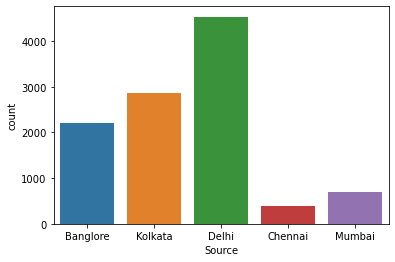

In [15]:
sns.countplot("Source",data=data)

 From the above plot we conclude that most of the flights departured from the Delhi

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination', ylabel='count'>

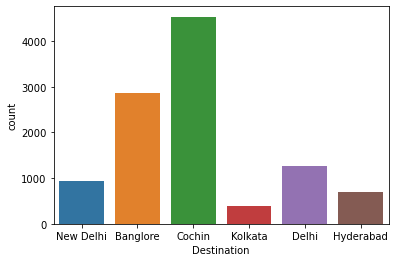

In [16]:
sns.countplot("Destination",data=data)

From the above plot we conclude that most of the flights arrived to Cochin

<AxesSubplot:xlabel='Price', ylabel='Count'>

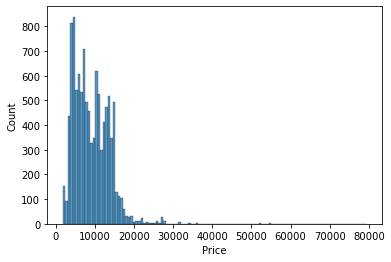

In [17]:
sns.histplot(data['Price'])

From the above plot we conclude that feature price is positively skewed and we wil convert it into normal distribution

# Bivariate Analysis

<AxesSubplot:xlabel='Source', ylabel='Price'>

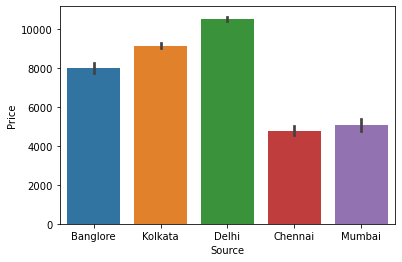

In [18]:
sns.barplot(x='Source',y='Price',data=data)

From the above plot we conclude that price range for delhi source is higher and chennai source is lower

<AxesSubplot:xlabel='Destination', ylabel='Price'>

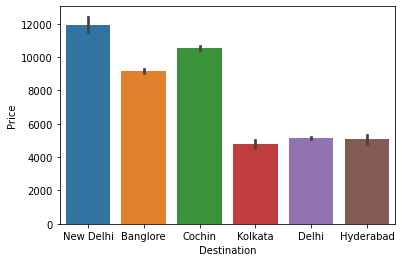

In [19]:
sns.barplot(x='Destination',y='Price',data=data)

From the above plot we conclude that price range for delhi destination is higher 

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

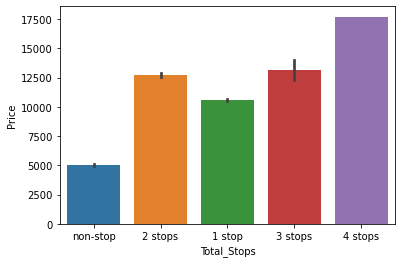

In [20]:
sns.barplot(x='Total_Stops',y='Price',data=data)

From the above plot we conclude that most of flights have 4 stops

# Data Preprocessing

<AxesSubplot:xlabel='Price'>

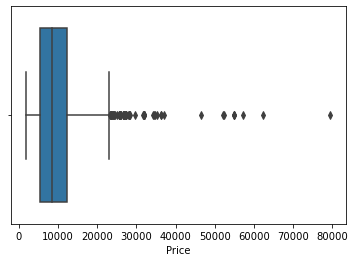

In [21]:
# Visualizing outliers in Price
sns.boxplot(x=data.Price)

From the above boxplot we conclude 'Price' column contain outliers

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

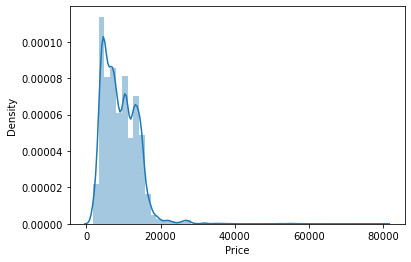

In [22]:
# checking ouliers
sns.distplot(data.Price)

From the above plot we conclude that 'Price' is positively skewed

In [23]:
# Interquartile range (IQR)

from scipy import stats

IQR = stats.iqr(data.Price, interpolation = 'midpoint') 

IQR

7096.0

In [24]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data.Price.quantile(0.25)
# Third quartile (Q3) 
Q3 =data.Price.quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [25]:
min_limit

-5367.0

In [26]:
max_limit

23017.0

In [27]:
## filetring the data
data.loc[data['Price'] < min_limit]
data.loc[data['Price'] > max_limit]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL ? BOM ? COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL ? BOM ? COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM ? JDH ? DEL ? HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM ? BDQ ? DEL ? HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR ? MAA ? DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


In [28]:
## imputing the outliers as the count is high
data.loc[data['Price'] > max_limit,'Price']=np.median(data.Price)

In [29]:
data.Price.value_counts()

10262.0    258
10844.0    212
7229.0     162
4804.0     160
8372.0     137
          ... 
6010.0       1
19685.0      1
9502.0       1
5895.0       1
8971.0       1
Name: Price, Length: 1826, dtype: int64

In [30]:
data.loc[data['Price'] > max_limit]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


<AxesSubplot:xlabel='Price'>

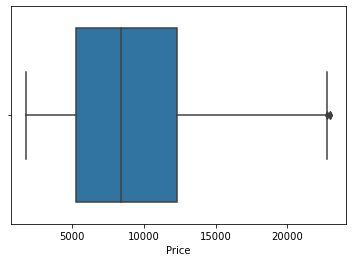

In [31]:
sns.boxplot(x=data.Price)

From the above plot we conclude that most of the null values dropped from 'Price' column.

In [32]:
# Price column is positively skewed so log is applying
data['Price'] = np.log(data['Price'])

<AxesSubplot:xlabel='Price', ylabel='Count'>

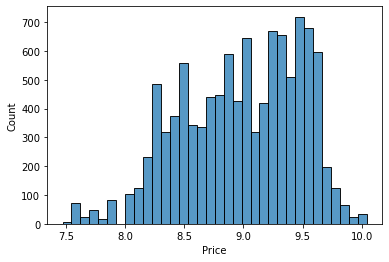

In [33]:
sns.histplot(data['Price'])

From the above plot we conclude that 'Price' is converted into normal distribution

# Feature Engineering

In [34]:
# Extracting information from Data of journey column and storing it to new columns
data['Journey_month']= pd.to_datetime(data["Date_of_Journey"], format="%d/%m/%Y").dt.month

data['Journey_day']= pd.to_datetime(data["Date_of_Journey"], format="%d/%m/%Y").dt.day


In [35]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [36]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,8.267962,3,24
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,8.944028,5,1
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,9.538348,6,9
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,8.735204,5,12
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,9.495670,3,1


In [37]:
# Similar to Date_of_journey now we extract Departure time

# Extracting Hour
data['Dep_hour']=pd.to_datetime(data['Dep_Time']).dt.hour

# Extracting minute
data['Dep_min']=pd.to_datetime(data['Dep_Time']).dt.minute

In [38]:
# Now we can drop Dep_Time as it is of no use
data.drop(["Dep_Time"], axis = 1, inplace = True)

In [39]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,8.267962,3,24,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,8.944028,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,9.538348,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,8.735204,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,9.495670,3,1,16,50


In [40]:
# similar to Date_of_journey now we can extract Arrival Time

# Extracting Arrival Hour
data['Arr_hour']= pd.to_datetime(data.Arrival_Time).dt.hour

# Extracting Arrival minute
data['Arr_min']= pd.to_datetime(data.Arrival_Time).dt.minute

In [41]:
# Now we can drop Arrival_Time as it is of no use
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [42]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,8.267962,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,8.944028,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,9.538348,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,8.735204,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,9.495670,3,1,16,50,21,35


In [43]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [44]:
# Adding duration_hours and duration_mins list to train_data dataframe

data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

In [45]:
data.drop(["Duration"], axis = 1, inplace = True)

In [46]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,8.267962,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,8.944028,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,9.538348,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,8.735204,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,9.495670,3,1,16,50,21,35,4,45


# Handling Categorical Data

In [47]:
data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [48]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = data["Airline"]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [49]:
data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [50]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [51]:
data.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [52]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [53]:
# concatenating that all encoded categorical columns with dataset

train_data = pd.concat([data, Airline, Source, Destination], axis = 1)

In [54]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dep_hour,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,8.267962,3,24,22,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,8.944028,5,1,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,9.538348,6,9,9,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,8.735204,5,12,18,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,9.495670,3,1,16,...,0,0,0,0,0,0,0,0,0,1


In [55]:
train_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [56]:
train_data.head()

,Route,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR ? DEL,non-stop,No info,8.267962,3,24,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU ? IXR ? BBI ? BLR,2 stops,No info,8.944028,5,1,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,DEL ? LKO ? BOM ? COK,2 stops,No info,9.538348,6,9,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,CCU ? NAG ? BLR,1 stop,No info,8.735204,5,12,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,BLR ? NAG ? DEL,1 stop,No info,9.495670,3,1,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [57]:
# Route and Toatl_stops are related to each other
# Route and additional_info are not contain much information
# We will drop Route and additional_info

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [58]:
train_data.head()

,Total_Stops,Price,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,non-stop,8.267962,3,24,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,8.944028,5,1,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2 stops,9.538348,6,9,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,8.735204,5,12,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1 stop,9.495670,3,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [59]:
train_data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [60]:
# Total_stops is ordinal data so converting categorical data using Label Encoder

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [61]:
train_data.head()

,Total_Stops,Price,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,8.267962,3,24,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,8.944028,5,1,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,9.538348,6,9,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,8.735204,5,12,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,9.495670,3,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [62]:
train_data.shape

(10682, 30)

In [63]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_month', 'Journey_day', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

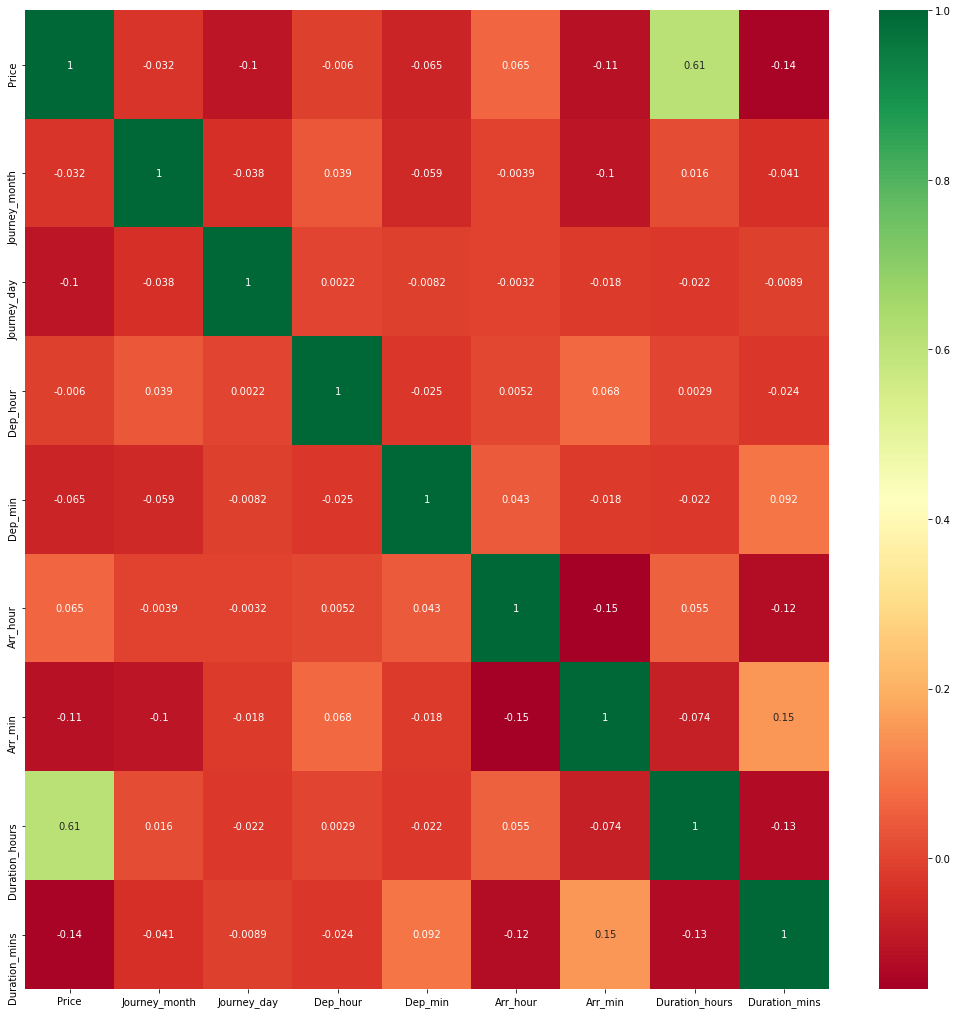

In [64]:
# Checking correlation of features
plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

From the above heatmap we see that none of the features are above threshold point i.e 0.85 so none of the features cannot be dropped by correlation.

In [65]:
# Defining X 
X = train_data.loc[:,['Total_Stops', 'Journey_month', 'Journey_day', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]

In [66]:
X.head()

,Total_Stops,Journey_month,Journey_day,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3,24,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,6,9,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,12,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,3,1,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
# Defining y
y = train_data.loc[:,"Price"]

In [68]:
y.head()

0    8.267962
1    8.944028
2    9.538348
3    8.735204
4    9.495670
Name: Price, dtype: float64

In [69]:
## Scaling the data as the magnitude of variables are varying lot
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() ## object creation
sclaed_x=sc.fit_transform(X) ## transforming the data
X = pd.DataFrame(sclaed_x,columns=X.columns) ##converting the arrays
## to dataframe


In [70]:
# creating Training and Testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10)

Creating a model using Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [72]:
y_hat = model.predict(X_test)

In [73]:
y_hat

array([9.25587076, 9.28572458, 9.3099479 , ..., 9.60618919, 9.12831443,
       9.22882408])

In [74]:
# importing metrics from sklearn library
from sklearn import metrics

In [75]:
model.score(X_train,y_train)

0.7259025523453844

In [76]:
r2score=metrics.r2_score(y_test,y_hat)

In [77]:
r2score

0.7235431485457953

In [78]:
X_test.shape

(2671, 29)

In [79]:
# Adjusted r2 score
# adj_r2 = 1-(1-r2score)*(n-1)/(n-p-1)
adj_r2 = 1-(1-0.72)*(2761-1)/(2671-29-1)

In [80]:
adj_r2

0.7073835668307459

Creating a model using Random Forest Regressor

In [81]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

RandomForestRegressor()

In [82]:
y_pred=model2.predict(X_test)

In [83]:
y_pred

array([9.21281023, 9.43101842, 9.41333238, ..., 9.36452208, 8.50770693,
       9.23556107])

In [84]:
model2.score(X_train,y_train)

0.9633136110386661

In [85]:
model2.score(X_test,y_test)

0.8551579558589004

In [86]:
r2score = metrics.r2_score(y_test,y_pred)

In [87]:
r2score

0.8551579558589004

In [88]:
# Adjusted r2 score
# adj_r2 = 1-(1-r2score)*(n-1)/(n-p-1)
adj_r2 = 1-(1-0.85)*(2761-1)/(2671-29-1)

In [89]:
adj_r2

0.843241196516471

Creating a model using Gradient Boosting Regressor

In [90]:
from sklearn.ensemble import GradientBoostingRegressor
model3 = GradientBoostingRegressor()
model3.fit(X_train,y_train)

GradientBoostingRegressor()

In [91]:
y_predict = model3.predict(X_test)

In [92]:
y_predict

array([9.34900944, 9.36458278, 9.34220514, ..., 9.50313226, 9.00421163,
       9.37537457])

In [93]:
model3.score(X_train,y_train)

0.8259037525630577

In [94]:
metrics.r2_score(y_test,y_predict)

0.8232450316581851

In [95]:
# Adjusted r2 score
# adj_r2 = 1-(1-r2score)*(n-1)/(n-p-1)
adj_r2 = 1-(1-0.82)*(2761-1)/(2671-29-1)

In [96]:
adj_r2

0.8118894358197652

Creating a model using XGBoost Regressor

In [97]:
# importing xgboost
import xgboost 

In [98]:
# Creating a model
from xgboost import XGBRegressor
xgb_r=XGBRegressor()
xgb_r.fit(X_train,y_train)
y_hatt=xgb_r.predict(X_test)

In [99]:
y_hat

array([9.25587076, 9.28572458, 9.3099479 , ..., 9.60618919, 9.12831443,
       9.22882408])

In [100]:
xgb_r.score(X_train,y_train)

0.9383041599872425

In [101]:
xgb_r.score(X_test,y_test)

0.8840939474222517

In [102]:
r2score = metrics.r2_score(y_test,y_hatt)

In [103]:
r2score

0.8840939474222517

In [104]:
# Adjusted r2 score
# adj_r2 = 1-(1-r2score)*(n-1)/(n-p-1)
adj_r2 = 1-(1-0.88)*(2761-1)/(2671-29-1)

In [105]:
adj_r2

0.8745929572131769

# Hyperparameter Tuning

In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [107]:
#Randomized Search CV using Random Forest Regressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [108]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [109]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = model2, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [110]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [111]:
rf_random.best_score_

0.8680649252581647

In [112]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [113]:
#Randomized Search CV using XGBoost Regressor

# Number of estimators
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Maximum depth
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

In [114]:
# Create the random grid

xgb_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}

In [115]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
xgb_random = RandomizedSearchCV(estimator = xgb_r, param_distributions = xgb_grid,  verbose=2, random_state=42, n_jobs = 1)

In [116]:
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................max_depth=5, n_estimators=500; total time=   2.9s
[CV] END ......................max_depth=5, n_estimators=500; total time=   2.9s
[CV] END ......................max_depth=5, n_estimators=500; total time=   3.1s
[CV] END ......................max_depth=5, n_estimators=500; total time=   3.1s
[CV] END ......................max_depth=5, n_estimators=500; total time=   3.0s
[CV] END .....................max_depth=30, n_estimators=300; total time=   3.0s
[CV] END .....................max_depth=30, n_estimators=300; total time=   3.0s
[CV] END .....................max_depth=30, n_estimators=300; total time=   3.0s
[CV] END .....................max_depth=30, n_estimators=300; total time=   3.1s
[CV] END .....................max_depth=30, n_estimators=300; total time=   3.0s
[CV] END .....................max_depth=10, n_estimators=700; total time=   3.9s
[CV] END .....................max_depth=10, n_es

RandomizedSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=4,
                                          num_parallel_tree=1, random_state=0,
                                          reg_alpha=0, reg_lambda=1,
                                          scale_pos_weight=1, subsample=1,
  

In [117]:
xgb_random.best_params_

{'n_estimators': 100, 'max_depth': 5}

In [118]:
xgb_random.best_score_

0.8769203292265265

As seen above we tried to predict the flight fare using Linear Regression, Random Forest Regressor, Gradient Boosting  and XGboost Regressor. We got maximum r2_score for XGBoost Regressor that is 88%